In [2]:
import json
import pandas as pd
import numpy as np
import itertools
import collections

In [23]:
'''bbox[0] = 'ymin'
   bbox[1] = 'xmin'
   bbox[2] = 'ymax'
   bbox[3] = 'xmax'
# 0: ymin, 1: xmin, 2: ymax, 3: xmax'''
colum_list = ['json_source', 'filename', 'obj_list', 'obj_sum_cnt', 'test_counter' ,'score_counter']
# ans_obj_list=[]


# row_list = []

# per_file_per_object_info_list = []

df_1 = pd.DataFrame(columns=colum_list)


with open('2020_02_26_Test.json') as json_file:
    json_data = json.load(json_file)
    file_name_list = list(json_data)
    object_list = []
    for filename in file_name_list:
        #print(filename)
        object_list[:]=[]
        #print("object_list 조사",object_list)
        file_info = json_data[filename]
        '''['0', '1', '2', '3', '4']'''
        
        obj_cnt_list = list(file_info)
        obj_cnt = len(obj_cnt_list)
        # print('여기서', obj_cnt_list)
        if not obj_cnt_list:
            # print("List 가 비었다")
            df_1 = df_1.append({
                "json_source": '2020_02_26_Test.json',
                "filename": filename,
                "obj_sum_cnt": "0",
                "obj_list": "Null"
            }, ignore_index=True)
        else:
            print("List가 비지 않았다")
            for obj_idx in obj_cnt_list[:]:
                try:
                    pop_ele = obj_cnt_list.pop(len(obj_idx)-1)
                    print(pop_ele)
                    object_list.append(file_info[pop_ele]['name'])
                    if not obj_cnt_list:
                        # print(filename, obj_cnt, object_list)
                        np_mat = np.array(object_list)
                        print(np_mat)
                        df_1 = df_1.append({
                            "json_source": '2020_02_26_Test.json',
                            "filename": filename,
                            "obj_sum_cnt":  obj_cnt,
                            "obj_list":  np_mat,
                            "test_counter": collections.Counter(np_mat)
                        }, ignore_index=True)
                    else:
                        print('obj_cnt_list에서 꺼낼 것이 있다')
                except:
                    ''' pop_ele에 원소 없으면 오류 발생할테니 '''
                    continue

List가 비지 않았다
0
['grab_bottle_body']
List가 비지 않았다
0
['face']
List가 비지 않았다
0
obj_cnt_list에서 꺼낼 것이 있다
1
obj_cnt_list에서 꺼낼 것이 있다
2
['eat' 'eat' 'face']
List가 비지 않았다
0
obj_cnt_list에서 꺼낼 것이 있다
1
['eat' 'face']
List가 비지 않았다
0
obj_cnt_list에서 꺼낼 것이 있다
1
['eat' 'face']
List가 비지 않았다
0
['eat']


In [22]:
df_1

,json_source,filename,obj_list,obj_sum_cnt,test_counter
0,2020_02_26_Test.json,20IHPA1A_Test_LHW_01_1.jpg,Null,0,NaN
1,2020_02_26_Test.json,20IHPA1A_Test_LHW_01_2.jpg,[grab_bottle_body],1,{'grab_bottle_body': 1}
2,2020_02_26_Test.json,20IHPA1A_Test_LHW_01_3.jpg,[face],1,{'face': 1}
3,2020_02_26_Test.json,20IHPA1A_Test_LHW_01_4.jpg,"[eat, eat, face]",3,"{'eat': 2, 'face': 1}"
4,2020_02_26_Test.json,20IHPA1A_Test_LHW_01_5.jpg,"[eat, face]",2,"{'eat': 1, 'face': 1}"
5,2020_02_26_Test.json,20IHPA1A_Test_LHW_01_6.jpg,"[eat, face]",2,"{'eat': 1, 'face': 1}"
6,2020_02_26_Test.json,20IHPA1A_Test_LHW_01_7.jpg,Null,0,NaN
7,2020_02_26_Test.json,20IHPA1A_Test_LHW_01_8.jpg,[eat],1,{'eat': 1}


In [73]:
ans_df_1 = pd.read_csv("C:\\Users\\godof\\Documents\\Data_Model_Management\\test_image_output\\20191114.csv")
ans_df_1 = ans_df_1.drop(['width', 'height', 'obj_idx', 'ymin', 'xmin', 'ymax', 'xmax'], axis=1)
'''
특정 열을 날리고
'''
dict_ans_df = ans_df_1.to_dict
lst_dict_ans_df = list(dict_ans_df('records'))
colum_list = ['csv_source', 'filename', 'ans_obj_list', 'ans_obj_sum_cnt', 'ans_counter']
df_3 = pd.DataFrame(columns=colum_list)
lst_dict_ans_df = sorted(lst_dict_ans_df, key=lambda x: x['filename'])
for i, v in itertools.groupby(lst_dict_ans_df, lambda i:i['filename']):
    save_lst = list(v)
    obj_lst=[]
    if not obj_lst: 
        for cnt in range(0, len(save_lst)):
            obj_lst.append(save_lst[cnt]['obj_name'])
            np_mat = np.array(obj_lst)
            obj_sum_cnt = len(np_mat)
            if len(save_lst) - cnt==1:
                df_3 = df_3.append({
                    'csv_source': '20191114.csv',
                    'filename': i,
                    'ans_obj_list': np_mat,
                    'ans_obj_sum_cnt': obj_sum_cnt,
                    'ans_counter': collections.Counter(np_mat)
                    
                }, ignore_index=True)
            else:
                print("아직 남았다")
    else:
        print('비었다')

아직 남았다
아직 남았다
아직 남았다
아직 남았다
아직 남았다
아직 남았다
아직 남았다
아직 남았다
아직 남았다
아직 남았다
아직 남았다
아직 남았다


In [74]:
test = pd.concat([df_3, df_1], axis=1)

In [75]:
test

,csv_source,filename,ans_obj_list,ans_obj_sum_cnt,ans_counter,json_source,filename,obj_list,obj_sum_cnt,test_counter
0,20191114.csv,0276_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,0276_medi_014.jpg,[cap],1,{'cap': 1}
1,20191114.csv,0277_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,0277_medi_014.jpg,[cap],1,{'cap': 1}
2,20191114.csv,0278_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,0278_medi_014.jpg,[cap],1,{'cap': 1}
3,20191114.csv,0279_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,0279_medi_014.jpg,[cap],1,{'cap': 1}
4,20191114.csv,0280_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,0280_medi_014.jpg,[cap],1,{'cap': 1}
5,20191114.csv,0281_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,0281_medi_014.jpg,[cap],1,{'cap': 1}
6,20191114.csv,0282_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,0282_medi_014.jpg,[cap],1,{'cap': 1}
7,20191114.csv,0283_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,0283_medi_014.jpg,[cap],1,{'cap': 1}
8,20191114.csv,0284_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,0284_medi_014.jpg,[cap],1,{'cap': 1}
9,20191114.csv,0285_medi_014.jpg,[Null],1,{'Null': 1},2019_11_15_object_list.json,0285_medi_014.jpg,[cap],1,{'cap': 1}


In [76]:
'''중복된 열을 제거하기'''
test = test.loc[:,~test.columns.duplicated()]

In [77]:
test

,csv_source,filename,ans_obj_list,ans_obj_sum_cnt,ans_counter,json_source,obj_list,obj_sum_cnt,test_counter
0,20191114.csv,0276_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1}
1,20191114.csv,0277_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1}
2,20191114.csv,0278_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1}
3,20191114.csv,0279_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1}
4,20191114.csv,0280_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1}
5,20191114.csv,0281_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1}
6,20191114.csv,0282_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1}
7,20191114.csv,0283_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1}
8,20191114.csv,0284_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1}
9,20191114.csv,0285_medi_014.jpg,[Null],1,{'Null': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1}


In [78]:
'''문제지에서 추가적으로 더 잡은 object'''
test['excess']=test['test_counter']-test['ans_counter']

'''답지에서 못 찾은것'''
test['deficiency']=test['ans_counter']-test['test_counter']


In [79]:
test

,csv_source,filename,ans_obj_list,ans_obj_sum_cnt,ans_counter,json_source,obj_list,obj_sum_cnt,test_counter,excess,deficiency
0,20191114.csv,0276_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1},{},{}
1,20191114.csv,0277_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1},{},{}
2,20191114.csv,0278_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1},{},{}
3,20191114.csv,0279_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1},{},{}
4,20191114.csv,0280_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1},{},{}
5,20191114.csv,0281_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1},{},{}
6,20191114.csv,0282_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1},{},{}
7,20191114.csv,0283_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1},{},{}
8,20191114.csv,0284_medi_014.jpg,[cap],1,{'cap': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1},{},{}
9,20191114.csv,0285_medi_014.jpg,[Null],1,{'Null': 1},2019_11_15_object_list.json,[cap],1,{'cap': 1},{'cap': 1},{'Null': 1}


In [80]:
np_df_3 = df_3.to_numpy()
np_fr_df_2 = df_1.to_numpy()
np_fr_df_2.size

140

In [81]:
for rows, cows in zip (np_df_3, np_fr_df_2):
    print(rows, cows)

['20191114.csv' '0276_medi_014.jpg' array(['cap'], dtype='<U3') 1
 Counter({'cap': 1})] ['2019_11_15_object_list.json' '0276_medi_014.jpg'
 array(['cap'], dtype='<U3') 1 Counter({'cap': 1})]
['20191114.csv' '0277_medi_014.jpg' array(['cap'], dtype='<U3') 1
 Counter({'cap': 1})] ['2019_11_15_object_list.json' '0277_medi_014.jpg'
 array(['cap'], dtype='<U3') 1 Counter({'cap': 1})]
['20191114.csv' '0278_medi_014.jpg' array(['cap'], dtype='<U3') 1
 Counter({'cap': 1})] ['2019_11_15_object_list.json' '0278_medi_014.jpg'
 array(['cap'], dtype='<U3') 1 Counter({'cap': 1})]
['20191114.csv' '0279_medi_014.jpg' array(['cap'], dtype='<U3') 1
 Counter({'cap': 1})] ['2019_11_15_object_list.json' '0279_medi_014.jpg'
 array(['cap'], dtype='<U3') 1 Counter({'cap': 1})]
['20191114.csv' '0280_medi_014.jpg' array(['cap'], dtype='<U3') 1
 Counter({'cap': 1})] ['2019_11_15_object_list.json' '0280_medi_014.jpg'
 array(['cap'], dtype='<U3') 1 Counter({'cap': 1})]
['20191114.csv' '0281_medi_014.jpg' array(['c

In [82]:
colum_list = ['source', 'filename', 'ans_obj_list', 'ans_obj_sum_cnt', 'obj_list', 'obj_sum_cnt']
calcul_df = pd.DataFrame(columns=colum_list)

test_list = []
for rows, cows in zip (np_df_3, np_fr_df_2):
    test_list.append((rows, cows))

    
test_data_frame = pd.DataFrame(test_list)
np_test_data_frame = test_data_frame.to_numpy()
reshape_np_test_data_frame = np_test_data_frame.reshape(np_test_data_frame.size,1)
flatten_reshape_np_test_data_frame = reshape_np_test_data_frame.flatten()
for final_info in flatten_reshape_np_test_data_frame:
    if final_info[0].split(".")[-1] == 'csv':
        calcul_df = calcul_df.append({
            "source": final_info[0],
            "filename": final_info[1],
            "ans_obj_list": final_info[2],
            "ans_obj_sum_cnt": final_info[3]
                            }, ignore_index=True)
    else:
        calcul_df = calcul_df.append({
            "source": final_info[0],
            "filename": final_info[1],
            "obj_list": final_info[2],
            "obj_sum_cnt": final_info[3]
                            }, ignore_index=True)
        

calcul_df


,source,filename,ans_obj_list,ans_obj_sum_cnt,obj_list,obj_sum_cnt
0,20191114.csv,0276_medi_014.jpg,[cap],1,NaN,NaN
1,2019_11_15_object_list.json,0276_medi_014.jpg,NaN,NaN,[cap],1
2,20191114.csv,0277_medi_014.jpg,[cap],1,NaN,NaN
3,2019_11_15_object_list.json,0277_medi_014.jpg,NaN,NaN,[cap],1
4,20191114.csv,0278_medi_014.jpg,[cap],1,NaN,NaN
5,2019_11_15_object_list.json,0278_medi_014.jpg,NaN,NaN,[cap],1
6,20191114.csv,0279_medi_014.jpg,[cap],1,NaN,NaN
7,2019_11_15_object_list.json,0279_medi_014.jpg,NaN,NaN,[cap],1
8,20191114.csv,0280_medi_014.jpg,[cap],1,NaN,NaN
9,2019_11_15_object_list.json,0280_medi_014.jpg,NaN,NaN,[cap],1


In [83]:
calcul_df.to

AttributeError: 'DataFrame' object has no attribute 'to'

In [272]:
'''
비교하는 모델 

python argparse

필요 할 듯

'''
for rows, cows, tows, pills in zip (np_df_3, np_df_4, np_df_4, np_df_3):
    print(rows, cows, tows, pills)

['20191114.csv' '0276_medi_014.jpg' array(['cap'], dtype='<U3') 1] ['20191115.csv' '0102_medi_052.jpg' array(['hand'], dtype='<U4') 1] ['20191115.csv' '0102_medi_052.jpg' array(['hand'], dtype='<U4') 1] ['20191114.csv' '0276_medi_014.jpg' array(['cap'], dtype='<U3') 1]
['20191114.csv' '0277_medi_014.jpg' array(['cap'], dtype='<U3') 1] ['20191115.csv' '0103_medi_052.jpg' array(['cap'], dtype='<U3') 1] ['20191115.csv' '0103_medi_052.jpg' array(['cap'], dtype='<U3') 1] ['20191114.csv' '0277_medi_014.jpg' array(['cap'], dtype='<U3') 1]
['20191114.csv' '0278_medi_014.jpg' array(['cap'], dtype='<U3') 1] ['20191115.csv' '0104_medi_052.jpg' array(['cap'], dtype='<U3') 1] ['20191115.csv' '0104_medi_052.jpg' array(['cap'], dtype='<U3') 1] ['20191114.csv' '0278_medi_014.jpg' array(['cap'], dtype='<U3') 1]
['20191114.csv' '0279_medi_014.jpg' array(['cap'], dtype='<U3') 1] ['20191115.csv' '0105_medi_052.jpg' array(['cap'], dtype='<U3') 1] ['20191115.csv' '0105_medi_052.jpg' array(['cap'], dtype='<U

In [189]:
mylist = []
print(len(np_df_3))
print(len(np_df_4))
for rows, cows in zip (np_df_3, np_df_4):
    mylist.append((rows, cows))
    


72
72


In [190]:
print(type(mylist))

<class 'list'>


In [196]:
print(len(mylist))

72


In [198]:
df = pd.DataFrame(mylist)

In [202]:
np_test = df.to_numpy()

In [268]:
np_test.size

144

In [269]:
'''
72 * 2 = 144
'''
reshape = np_test.reshape(np_test.size,1) 



'\n72 * 2 = 144\n'

In [270]:
reshape.shape

(144, 1)

In [232]:
reshape

array([[array(['20191114.csv', '0276_medi_014.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)],
       [array(['20191115.csv', '0102_medi_052.jpg', array(['hand'], dtype='<U4'),
       1], dtype=object)],
       [array(['20191114.csv', '0277_medi_014.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)],
       [array(['20191115.csv', '0103_medi_052.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)],
       [array(['20191114.csv', '0278_medi_014.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)],
       [array(['20191115.csv', '0104_medi_052.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)],
       [array(['20191114.csv', '0279_medi_014.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)],
       [array(['20191115.csv', '0105_medi_052.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)],
       [array(['20191114.csv', '0280_medi_014.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)],
       [array(['20191115.cs

In [226]:
flatten_reshpae = reshape.flatten()
flatten_reshpae.shape

(144,)

In [242]:
for t1 in reshape:
    print(t1)

[array(['20191114.csv', '0276_medi_014.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)]
[array(['20191115.csv', '0102_medi_052.jpg', array(['hand'], dtype='<U4'),
       1], dtype=object)]
[array(['20191114.csv', '0277_medi_014.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)]
[array(['20191115.csv', '0103_medi_052.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)]
[array(['20191114.csv', '0278_medi_014.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)]
[array(['20191115.csv', '0104_medi_052.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)]
[array(['20191114.csv', '0279_medi_014.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)]
[array(['20191115.csv', '0105_medi_052.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)]
[array(['20191114.csv', '0280_medi_014.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)]
[array(['20191115.csv', '0106_medi_052.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)]

In [273]:
for f1 in flatten_reshpae:
    '''
    각각 변수 지정
    '''
    print(f1[0],f1[1],f1[2],f1[3])

20191114.csv 0276_medi_014.jpg ['cap'] 1
20191115.csv 0102_medi_052.jpg ['hand'] 1
20191114.csv 0277_medi_014.jpg ['cap'] 1
20191115.csv 0103_medi_052.jpg ['cap'] 1
20191114.csv 0278_medi_014.jpg ['cap'] 1
20191115.csv 0104_medi_052.jpg ['cap'] 1
20191114.csv 0279_medi_014.jpg ['cap'] 1
20191115.csv 0105_medi_052.jpg ['cap'] 1
20191114.csv 0280_medi_014.jpg ['cap'] 1
20191115.csv 0106_medi_052.jpg ['cap'] 1
20191114.csv 0281_medi_014.jpg ['cap'] 1
20191115.csv 0107_medi_052.jpg ['bottle'] 1
20191114.csv 0282_medi_014.jpg ['cap'] 1
20191115.csv 0108_medi_052.jpg ['bottle'] 1
20191114.csv 0283_medi_014.jpg ['cap'] 1
20191115.csv 0109_medi_052.jpg ['bottle'] 1
20191114.csv 0284_medi_014.jpg ['cap'] 1
20191115.csv 0110_medi_052.jpg ['bottle'] 1
20191114.csv 0285_medi_014.jpg ['Null'] 1
20191115.csv 0111_medi_052.jpg ['bottle'] 1
20191114.csv 0286_medi_014.jpg ['Null'] 1
20191115.csv 0112_medi_052.jpg ['bottle'] 1
20191114.csv 0287_medi_014.jpg ['Null'] 1
20191115.csv 0113_medi_052.jpg ['bo

In [233]:
test_1 = pd.DataFrame(reshape)

In [234]:
test_2 = pd.DataFrame(flatten_reshpae)

In [217]:
final_df = pd.DataFrame(reshape)

In [215]:
kj_np = final_df.to_numpy()

In [216]:
kj_np[0]

array([array(['20191114.csv', '0276_medi_014.jpg', array(['cap'], dtype='<U3'),
       1], dtype=object)], dtype=object)

In [86]:
for x,y in np.nditer([np_df_3, np_df_4]):
    print(x, y)

TypeError: Iterator operand or requested dtype holds references, but the REFS_OK flag was not enabled

In [6]:
'''
출처: https://github.com/codebasics/py/tree/master/numpy

'''

a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
for row in a:
    print(row)

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]


In [8]:
for row in a:
    for cell in row:
        print(cell)

0
1
2
3
4
5
6
7
8
9
10
11


In [9]:
for cell in a.flatten():
    print(cell)

0
1
2
3
4
5
6
7
8
9
10
11


In [10]:
for x in np.nditer(a, order='C'):
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11


In [11]:
for x in np.nditer(a, order='F'):
    print(x)

0
4
8
1
5
9
2
6
10
3
7
11


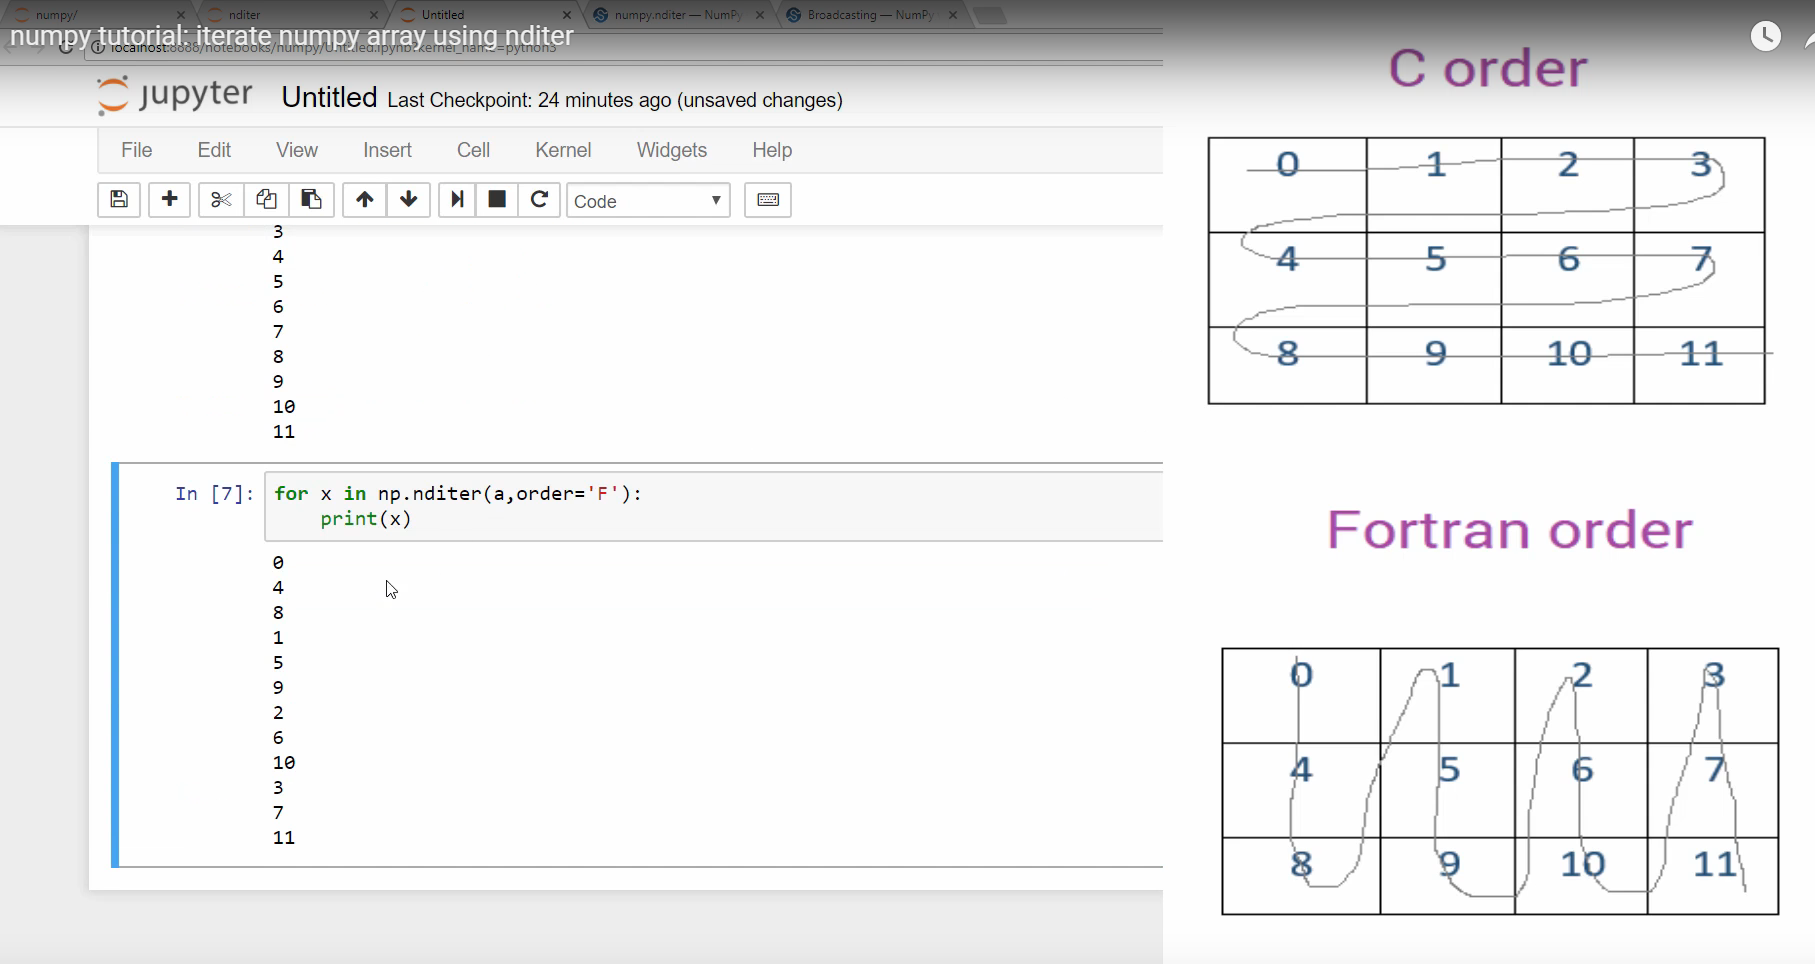

In [12]:
for x in np.nditer(a, order='F', flags=['external_loop']):
    print(x)

[0 4 8]
[1 5 9]
[ 2  6 10]
[ 3  7 11]


In [13]:
for x in np.nditer(a, op_flags=['readwrite']):
    x[...]=x*x

In [14]:
a

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

In [17]:
b = np.arange(3, 15, 4).reshape(3,1)
b

array([[ 3],
       [ 7],
       [11]])

In [20]:
for x,y in np.nditer([a, b]):
    print(x, y)

0 3
1 3
4 3
9 3
16 7
25 7
36 7
49 7
64 11
81 11
100 11
121 11
